In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import time

In [ ]:
#Function to extract only the time of the start time column.
def time_only(time):
    a = pd.Timestamp(time)
    b = a.round(freq = '30min')
    return b

In [2]:
#Read csv as dataframe.
RdfDW = pd.read_csv(r'...path...\nilm_analyzer_EM401\Working Files\Visualisation\Activations Data\UKDALE_dishwasher_activations.csv', index_col = 0)
RdfWM = pd.read_csv(r'...path...\nilm_analyzer_EM401\Working Files\Visualisation\Activations Data\UKDALE_washingmachine_activations.csv', index_col = 0)

In [3]:
#Sort for activtiy start
dfDW.sort_values(by = 'activity_start', ascending = True, inplace=True)
dfWM.sort_values(by = 'activity_start', ascending = True, inplace=True)

In [5]:
#Applies time_only function.
dfDW['start'] = dfDW['activity_start'].apply(time_only)
dfWM['start'] = dfWM['activity_start'].apply(time_only)

In [6]:
dfDW['start'] = dfDW['start'].dt.time
dfWM['start'] = dfWM['start'].dt.time

In [7]:
touDW = dfDW['start'].astype(str)
touWM = dfWM['start'].astype(str)

In [8]:
touDW = touDW.sort_values(ascending = True)
touWM = touWM.sort_values(ascending = True)

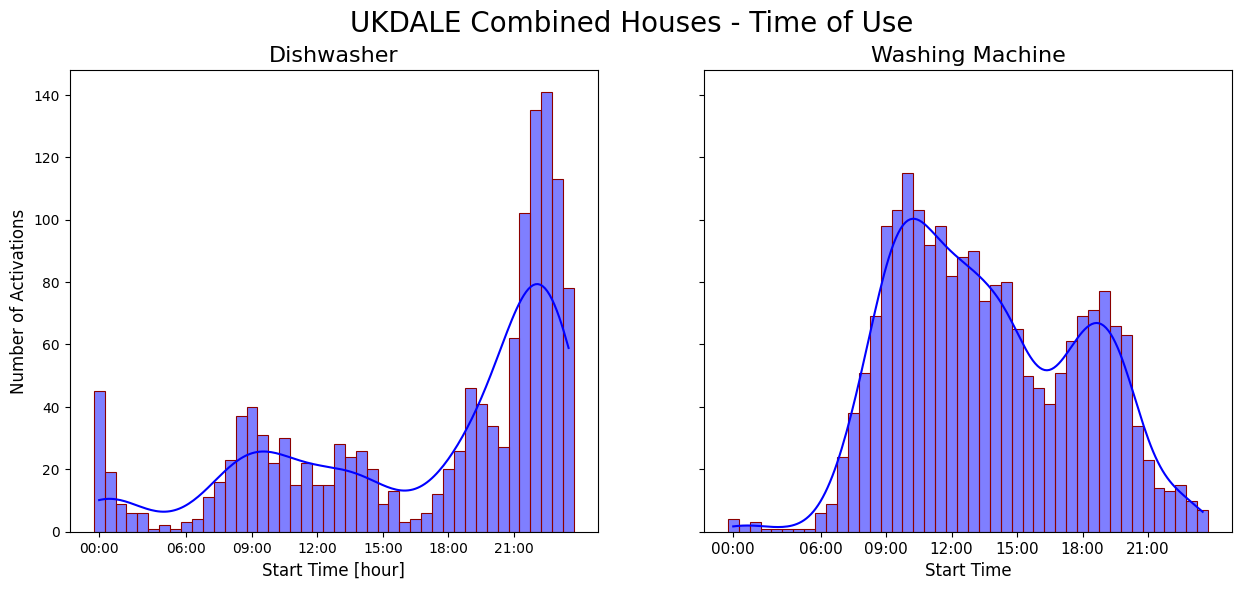

In [34]:
#plots the combined time of use.
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6), sharey= True)
fig.suptitle('UKDALE Combined Houses - Time of Use', fontsize = 20)
sns.histplot(touDW, bins='auto', kde=True, color='blue', edgecolor = 'darkred', ax = ax[0])
sns.histplot(touWM, bins= 'auto', kde=True, color='blue', edgecolor = 'darkred', ax= ax[1])
plt.setp(ax, xticks=['00:00:00','06:00:00','09:00:00','12:00:00','15:00:00','18:00:00','21:00:00'], xticklabels = ['00:00','06:00','09:00','12:00','15:00','18:00','21:00'])
ax[0].set_xlabel('Start Time [hour]',fontsize = 12)
ax[1].set_xlabel('Start Time', fontsize = 12)
ax[0].set_ylabel('Number of Activations', fontsize = 12)
ax[1].set_ylabel('Activations', fontsize = 12)
ax[0].set_title('Dishwasher', fontsize = 16)
ax[1].set_title('Washing Machine', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 18)
plt.show()